# Liberias 

In [18]:
import os
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [19]:
BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), ".."))  # Subir un nivel
DATA_DIR = os.path.join(BASE_DIR, "data", "processed") 


🔍 Evaluando importancia de variables en: v1


,Variable,Importancia
21,Tiempo,0.793701
13,Zona_Renta,0.092084
17,COSTE_VENTA,0.032018
18,km_anno,0.019135
0,PRODUCTO,0.012393
1,TIPO_CARROCERIA,0.007483
9,PROVINCIA,0.006006
10,Campanna1,0.005547
15,Averia_grave,0.005018
5,FORMA_PAGO,0.004881


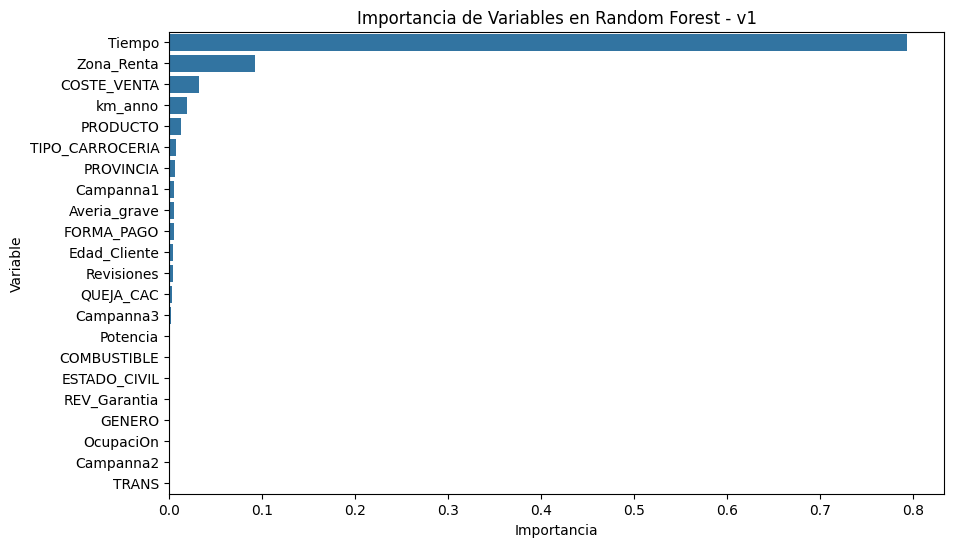


🔍 Evaluando importancia de variables en: v2


,Variable,Importancia
21,Tiempo,0.806694
13,Zona_Renta,0.082641
17,COSTE_VENTA,0.033894
18,km_anno,0.023683
0,PRODUCTO,0.010270
1,TIPO_CARROCERIA,0.005610
10,Campanna1,0.005535
9,PROVINCIA,0.004976
5,FORMA_PAGO,0.004794
19,Revisiones,0.004143


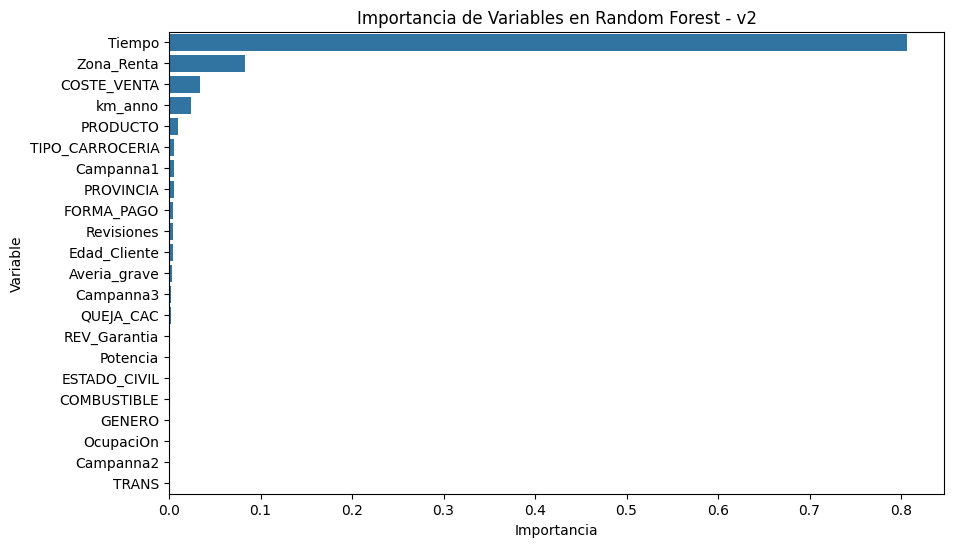


🔍 Evaluando importancia de variables en: v3


,Variable,Importancia
21,Tiempo,0.846439
17,COSTE_VENTA,0.038409
13,Zona_Renta,0.036537
18,km_anno,0.025661
0,PRODUCTO,0.009885
5,FORMA_PAGO,0.005931
10,Campanna1,0.005545
19,Revisiones,0.005255
9,PROVINCIA,0.004784
1,TIPO_CARROCERIA,0.004194


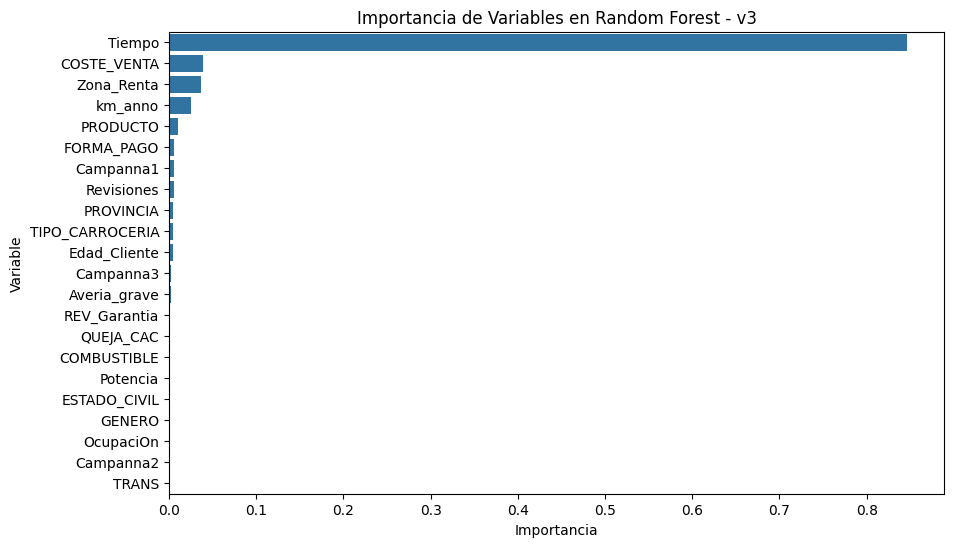


🔍 Evaluando importancia de variables en: v4


,Variable,Importancia
21,Tiempo,0.838849
13,Zona_Renta,0.040258
17,COSTE_VENTA,0.037599
18,km_anno,0.025243
0,PRODUCTO,0.010297
5,FORMA_PAGO,0.006506
19,Revisiones,0.005976
10,Campanna1,0.005543
9,PROVINCIA,0.005488
20,Edad_Cliente,0.004595


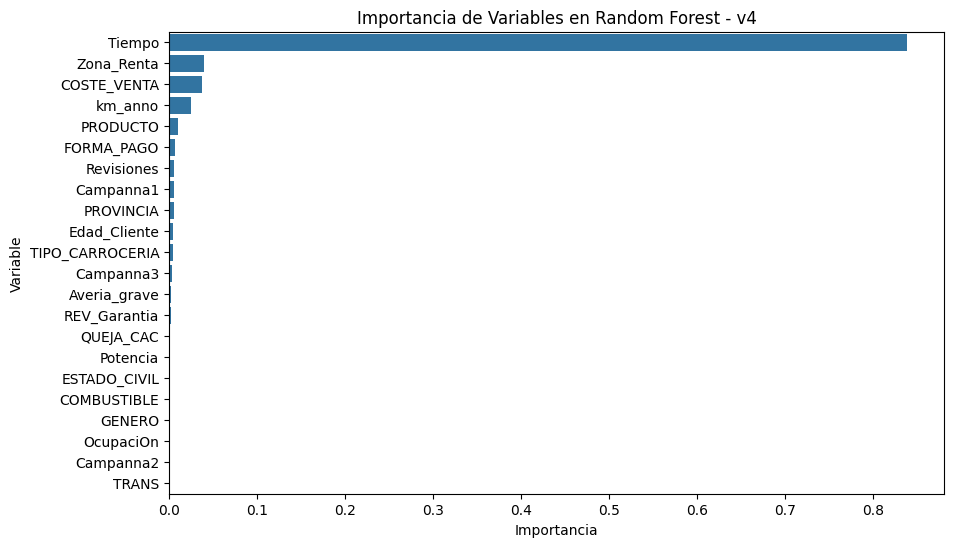

In [20]:
def evaluar_importancia_variables(data_dir):
    """
    Carga cada archivo CSV en la carpeta `data/processed`, entrena un Random Forest
    y calcula la importancia de las variables.
    
    Parámetros:
    - data_dir (str): Ruta a la carpeta donde están los archivos CSV.

    Retorna:
    - Diccionario con la importancia de variables para cada dataset.
    """
    resultados = {}

    # Lista de archivos esperados
    file_paths = {
        "v1": os.path.join(data_dir, "Propensity_clean_v1.csv"),
        "v2": os.path.join(data_dir, "Propensity_clean_v2.csv"),
        "v3": os.path.join(data_dir, "Propensity_clean_v3.csv"),
        "v4": os.path.join(data_dir, "Propensity_clean_v4.csv"),
    }

    for version, path in file_paths.items():
        print(f"\n🔍 Evaluando importancia de variables en: {version}")

        # Cargar los datos
        df = pd.read_csv(path)

        # Verificar si la columna "Mas_1_coche" está presente y eliminar columnas problemáticas
        if "Mas_1_coche" in df.columns:
            y = df["Mas_1_coche"]
            X = df.drop(columns=["Mas_1_coche"], errors="ignore")
        # Eliminar columnas no numéricas si existen
        X = X.select_dtypes(include=['number'])

        # Dividir en entrenamiento y prueba
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Entrenar un Random Forest básico
        rf = RandomForestClassifier(n_estimators=100, random_state=42)
        rf.fit(X_train, y_train)

        # Obtener importancia de variables
        importances = rf.feature_importances_
        feature_importance_df = pd.DataFrame({"Variable": X.columns, "Importancia": importances})
        feature_importance_df = feature_importance_df.sort_values(by="Importancia", ascending=False)

        # Guardar resultados
        resultados[version] = feature_importance_df

        # Mostrar la tabla de importancia de variables
        display(feature_importance_df)

        # Graficar la importancia de las variables
        plt.figure(figsize=(10, 6))
        sns.barplot(x="Importancia", y="Variable", data=feature_importance_df)
        plt.title(f"Importancia de Variables en Random Forest - {version}")
        plt.show()

    return resultados


# Ejecutar la función con la ruta corregida
importancia_variables_resultados = evaluar_importancia_variables(DATA_DIR)


In [21]:
comparacion_df = pd.DataFrame()

for version, df_importance in importancia_variables_resultados.items():
    df_importance = df_importance.rename(columns={"Importancia": f"Importancia_{version}"})
    if comparacion_df.empty:
        comparacion_df = df_importance
    else:
        comparacion_df = comparacion_df.merge(df_importance, on="Variable", how="outer")


comparacion_df["Importancia_Promedio"] = comparacion_df.drop(columns=["Variable"]).mean(axis=1)

# Ordenar de mayor a menor importancia promedio
comparacion_df = comparacion_df.sort_values(by="Importancia_Promedio", ascending=False)
comparacion_df = comparacion_df.drop(columns=["Importancia_Promedio"])

display(comparacion_df)


,Variable,Importancia_v1,Importancia_v2,Importancia_v3,Importancia_v4
19,Tiempo,0.793701,0.806694,0.846439,0.838849
20,Zona_Renta,0.092084,0.082641,0.036537,0.040258
2,COSTE_VENTA,0.032018,0.033894,0.038409,0.037599
21,km_anno,0.019135,0.023683,0.025661,0.025243
11,PRODUCTO,0.012393,0.010270,0.009885,0.010297
3,Campanna1,0.005547,0.005535,0.005545,0.005543
8,FORMA_PAGO,0.004881,0.004794,0.005931,0.006506
17,TIPO_CARROCERIA,0.007483,0.005610,0.004194,0.004323
12,PROVINCIA,0.006006,0.004976,0.004784,0.005488
16,Revisiones,0.004407,0.004143,0.005255,0.005976
